In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [26]:
mpg = sns.load_dataset('mpg')
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [27]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [28]:
mpg.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

## Missing data

In [29]:
#horsepower의 NAN값 확인
mpg[mpg.horsepower.isnull()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,usa,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,usa,amc concord dl


In [30]:
# nan 드랍
mpg.dropna()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [31]:
!pip install missingno

In [32]:
import missingno

In [33]:
dir(missingno)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_version',
 'bar',
 'dendrogram',
 'heatmap',
 'matrix',
 'missingno',
 'nullity_filter',
 'nullity_sort',
 'utils']

<AxesSubplot:>

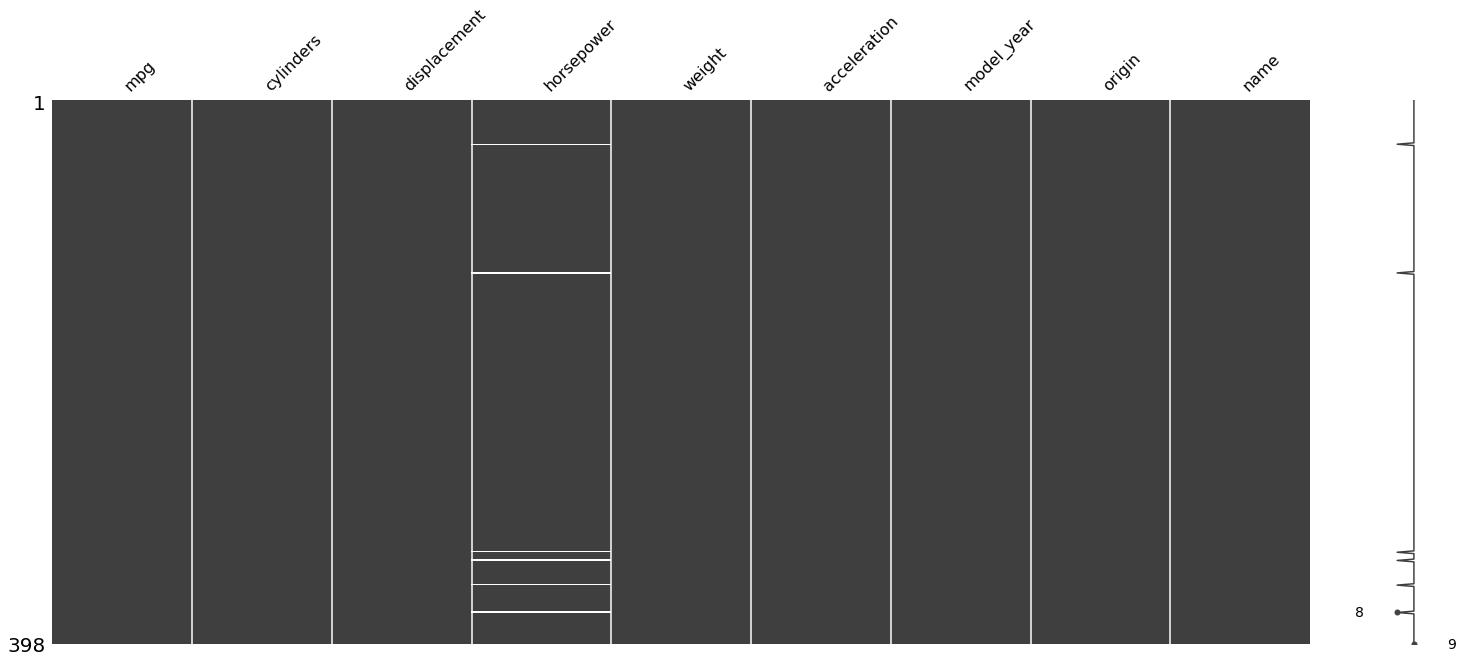

In [34]:
missingno.matrix(mpg)

<AxesSubplot:>

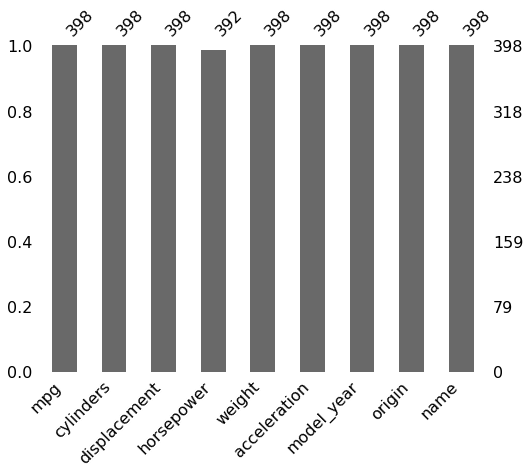

In [35]:
missingno.bar(mpg,figsize=(8,6))

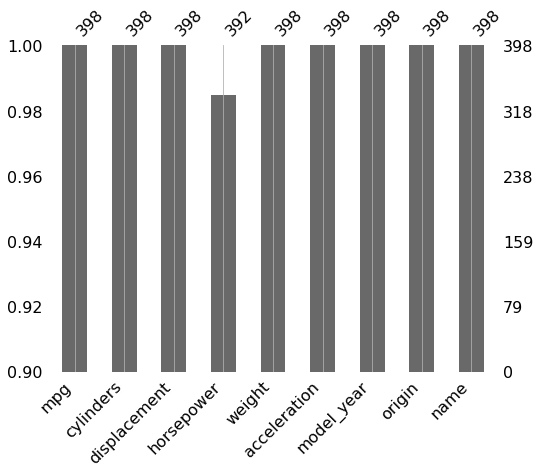

In [37]:
# matplotlib은 쉽게 그릴 수는 없지만 , customizing은 잘 할 수 있는 장점이 있다.
missingno.bar(mpg,figsize=(8,6))
plt.ylim((.9,1)) # 0.9 부터 1까지 그리겠다는 뜻
plt.grid(True)

<AxesSubplot:>

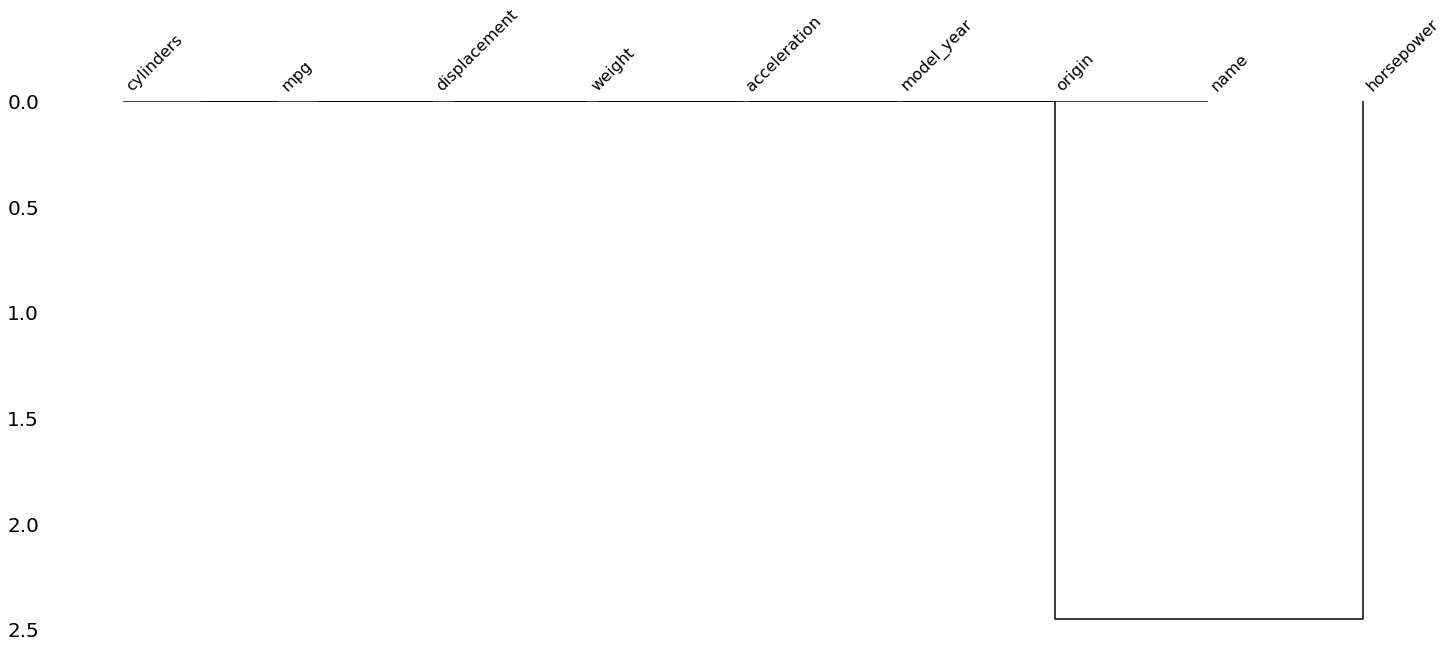

In [38]:
#dendrogram은 계층적 구조를 그려주어서 유용하다.
#그러나 mpg 데이터셋에서는 크게 유용하지 않다.
#데이터 성격에 따라서 missing no
missingno.dendrogram(mpg)

In [39]:
# missing value를 버리기.
mpg.dropna(inplace=True)

In [41]:
mpg.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [42]:
# 값의 종류가 어떻게 있는지, 몇개 있는지 알 수 있다.
mpg.origin.value_counts()

usa       245
japan      79
europe     68
Name: origin, dtype: int64

In [44]:
mpg.origin.describe()

count     392
unique      3
top       usa
freq      245
Name: origin, dtype: object

In [45]:
# astype은 데이터타입을 바꾼다.
mpg.origin = mpg.origin.astype('category')

In [46]:
mpg.origin

0         usa
1         usa
2         usa
3         usa
4         usa
        ...  
393       usa
394    europe
395       usa
396       usa
397       usa
Name: origin, Length: 392, dtype: category
Categories (3, object): ['europe', 'japan', 'usa']

In [47]:
# dtype을 category로 바꿔서 cat을 사용 할 수 있다.
# cat: category만 호출
mpg.origin.cat

In [50]:
mpg.origin.cat.categories.tolist()

['europe', 'japan', 'usa']

In [52]:
mpg.origin.unique()

['usa', 'japan', 'europe']
Categories (3, object): ['usa', 'japan', 'europe']

In [53]:
# category type은 문자열(.str) 기능도 사용할 수 있다.
# 할당하면 자동완성 단축키(tab)을 사용할 수 있다.
m = mpg.origin.str
m

In [55]:
m.get_dummies()

,europe,japan,usa
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
393,0,0,1
394,1,0,0
395,0,0,1
396,0,0,1
